In [1]:
import torch
import cv2
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image

In [2]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture Photo';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [6]:
def detect_food(filename, model):
    # Capture photo
    print('Capturing photo...')
    take_photo(filename)
    print('Saved to {}'.format(filename))

    # Read the captured image
    img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform inference using YOLOv5 model
    print('Performing inference...')
    results = model(img_rgb)

    # Display detected image and detected food items
    results.show()


Loading YOLOv5 model...


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-23 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Capturing photo...


<IPython.core.display.Javascript object>

Saved to captured_photo.jpg
Performing inference...


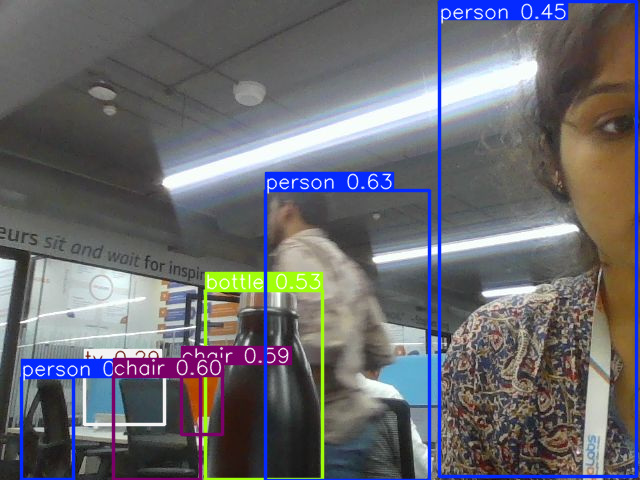

In [7]:
if __name__ == '__main__':
    # Load YOLOv5 model
    print('Loading YOLOv5 model...')
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

    # Perform detection on the captured photo
    captured_photo = 'captured_photo.jpg'
    detected_food = detect_food(captured_photo, model)
